In [43]:
import pandas as pd
import numpy as np
import os
import glob
from config import load_config
paths = load_config(dataset_key='all')
from natsort import natsorted
from skimage import io
import matplotlib.pyplot as plt
import h5py

Paths are for dataset tagged: all


['D:\\AIND\\output_data\\New folder (8)\\metadata_2023-01-11T11_36_52.csv']
(21874,)
[]


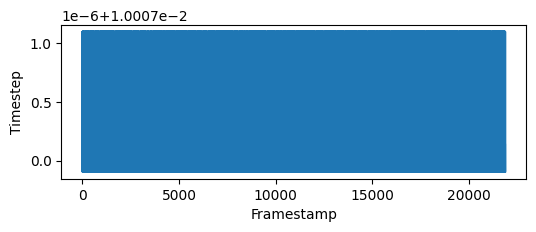

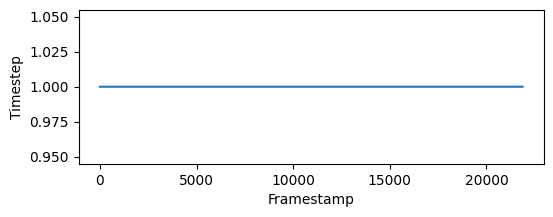

1980
36
216
524


In [44]:
# Read metadata files and extract timestamp of each frame
metadata_file = glob.glob(os.path.join(paths['raw_data'],'*.csv'))
print(metadata_file)
metadata = pd.read_csv(metadata_file[0])
timestamp = metadata.CameraTimestampSeconds + 10**-6*metadata.CameraTimestampMicroSeconds
time_vector = timestamp - timestamp[0]
print(time_vector.shape)

framestamp = np.asarray(metadata.Framestamp)
skip_frames = np.asarray(np.where(np.diff(framestamp) > 1))
skip_frames = skip_frames.flatten() +1
print(skip_frames)

f, ax = plt.subplots(figsize=(6,2))
ax.plot(np.diff(time_vector))
ax.set(xlabel='Framestamp', ylabel='Timestep')
plt.show()

f, ax = plt.subplots(figsize=(6,2))
ax.plot(np.diff(framestamp))
ax.set(xlabel='Framestamp', ylabel='Timestep')
plt.show()

width = metadata.Width[0]
print(width)
Xoffset = metadata.XOffset[0]
print(Xoffset)
height = metadata.Height[0]
print(height)
Yoffset = metadata.YOffset[0]
print(Yoffset)

In [45]:
# Read tiff files and extract intensity at each frame and pixel
files = os.listdir(paths['raw_data'])
tiff_dir = os.path.join(paths['raw_data'],files[1])
tiff_files = os.listdir(tiff_dir)
tiff_files = np.array(natsorted(tiff_files))
tiff_files

array(['Tiffs0.tif', 'Tiffs1.tif', 'Tiffs2.tif', 'Tiffs3.tif',
       'Tiffs4.tif', 'Tiffs5.tif', 'Tiffs6.tif', 'Tiffs7.tif',
       'Tiffs8.tif', 'Tiffs9.tif', 'Tiffs10.tif', 'Tiffs11.tif',
       'Tiffs12.tif', 'Tiffs13.tif', 'Tiffs14.tif', 'Tiffs15.tif',
       'Tiffs16.tif', 'Tiffs17.tif', 'Tiffs18.tif', 'Tiffs19.tif',
       'Tiffs20.tif', 'Tiffs21.tif'], dtype='<U11')

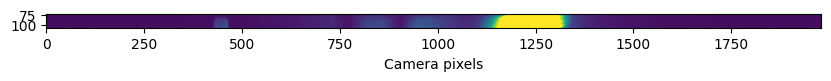

In [54]:
# Plot single tiff image and find spectran range 
tiff_file_path = os.path.join(tiff_dir,tiff_files[0])
temp = io.imread(tiff_file_path)
ylim = [108,72]

f,ax = plt.subplots(figsize=(10,6))
ax.imshow(temp[0,:,:],vmin=0, vmax=3000)
ax.set(xlabel='Camera pixels', ylim=ylim)
ax.grid(False)

In [55]:
for seq in range(0,np.size(tiff_files,0)):
    print(seq)
    tiff_file_path = os.path.join(tiff_dir,tiff_files[seq])
    temp = io.imread(tiff_file_path).astype(float)
    roi = temp[:,ylim[1]:ylim[0],:]
    print(roi.shape)
    added_intensity = roi.mean(axis=1)
    if seq == 0:
        img = added_intensity
    else:
        img = np.append(img,added_intensity,axis=0)

print(img.shape)

0
(1000, 36, 1980)
1
(1000, 36, 1980)
2
(1000, 36, 1980)
3
(1000, 36, 1980)
4
(1000, 36, 1980)
5
(1000, 36, 1980)
6
(1000, 36, 1980)
7
(1000, 36, 1980)
8
(1000, 36, 1980)
9
(1000, 36, 1980)
10
(1000, 36, 1980)
11
(1000, 36, 1980)
12
(1000, 36, 1980)
13
(1000, 36, 1980)
14
(1000, 36, 1980)
15
(1000, 36, 1980)
16
(1000, 36, 1980)
17
(1000, 36, 1980)
18
(1000, 36, 1980)
19
(1000, 36, 1980)
20
(1000, 36, 1980)
21
(874, 36, 1980)
(21874, 1980)


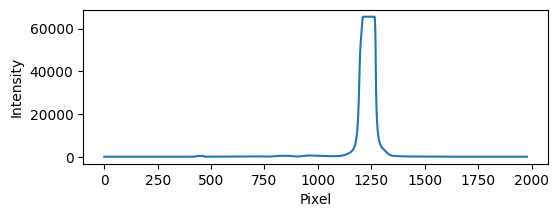

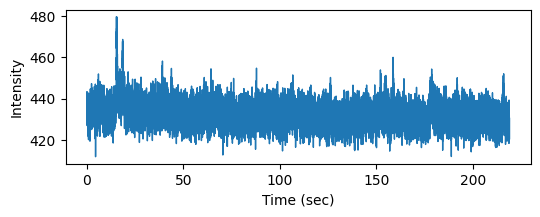

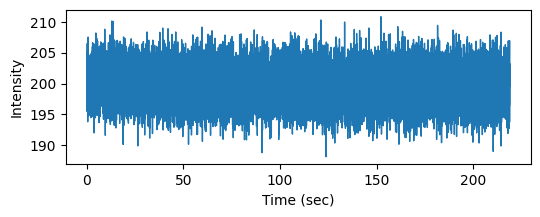

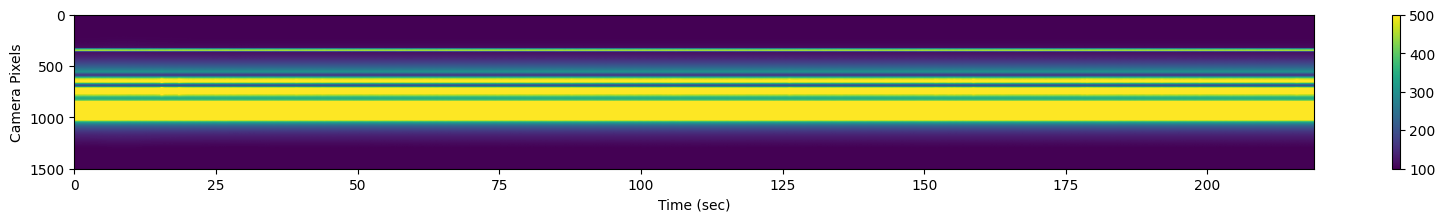

In [60]:
f, ax = plt.subplots(figsize=(6,2))
ax.plot(img[3,:])
ax.set(xlabel='Pixel', ylabel='Intensity')
plt.show()

t = np.size(time_vector)
f, ax = plt.subplots(figsize=(6,2))
pixel = 870
ax.plot(time_vector, img[0:t,pixel], linewidth=1)
ax.set(xlabel='Time (sec)', ylabel='Intensity')
plt.show()

f, ax = plt.subplots(figsize=(6,2))
pixel = 900
ax.plot(time_vector, img[0:t,pixel], linewidth=1)
ax.set(xlabel='Time (sec)', ylabel='Intensity')
plt.show()

f,ax = plt.subplots(figsize=(20,2))
im = ax.imshow(np.transpose(img), aspect='auto', vmin=100, vmax=500, extent=[time_vector.min(), time_vector.max(), 1500, 0])
ax.set(xlabel='Time (sec)', ylabel='Camera Pixels')
f.colorbar(im,ax=ax)
ax.grid(False)


Time
0          0.000000
1          0.010008
2          0.020015
3          0.030023
4          0.040030
            ...    
21869    218.852094
21870    218.862101
21871    218.872108
21872    218.882116
21873    218.892123
Length: 21874, dtype: float64

Wavelength
[400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435
 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453
 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471
 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489
 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525
 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543
 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561
 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579
 5

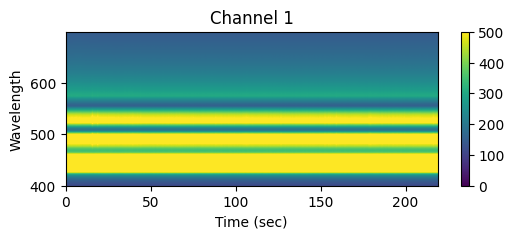

In [61]:
c = pd.read_hdf(paths['root']/'pixel_to_nm.hdf5', key='Camera_pixel', more='r')
w = pd.read_hdf(paths['root']/'pixel_to_nm.hdf5', key='Wavelength_nm', more='r')
wavelength = w.to_numpy()
camera_px = c.to_numpy()
cut = img.shape[0]

Channel1 = np.zeros([cut,wavelength.shape[0]]).astype('int')
for px in range(0,wavelength.shape[0]):
    Channel1[:,px] = img[0:cut,camera_px[px]-Xoffset]

time = time_vector
data_preprocessed = {'Time':time, 'Wavelength':wavelength, 'Channel1':Channel1}
for key in data_preprocessed.keys():
    print(f'\n{key}')
    print(data_preprocessed[key])
    
f,ax = plt.subplots(figsize=(6,2))
i = ax.imshow(np.transpose(Channel1), aspect='auto', vmin=0, vmax=500, extent=[np.min(time), np.max(time), 699, 400])
ax.set(xlabel='Time (sec)', ylabel='Wavelength', title='Channel 1', ylim=[400,699])
ax.grid(False)
f.colorbar(i,ax=ax)
plt.show()

hf = h5py.File(paths['raw_data'] / 'data_preprocessed.hdf5','a')
for key in data_preprocessed.keys():
    hf.create_dataset(key, data = data_preprocessed[key])
hf.close()

In [62]:
with h5py.File(paths['raw_data']/'data_preprocessed.hdf5','r') as f:
    print(f.keys())

f = h5py.File(paths['raw_data'] / 'data_preprocessed.hdf5','r')
channel_1 = f['Channel1']
print(channel_1.shape)
time = f['Time']
print(time.shape)
wavelength = f['Wavelength']
print(wavelength.shape)

print(time[-1])

<KeysViewHDF5 ['Channel1', 'Time', 'Wavelength']>
(21874, 300)
(21874,)
(300,)
218.8921229839325


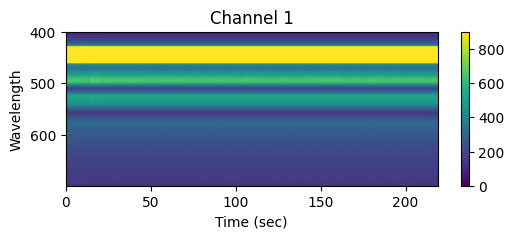

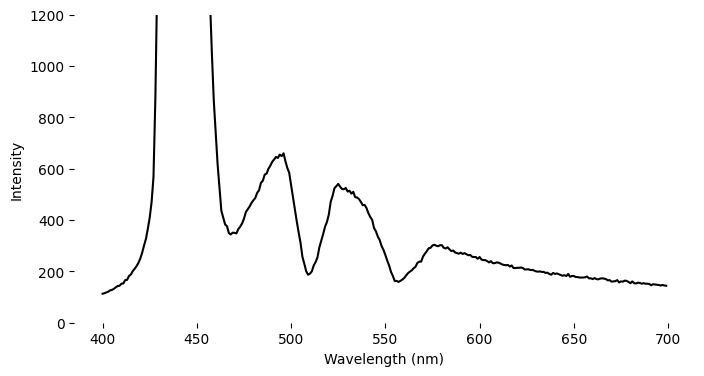

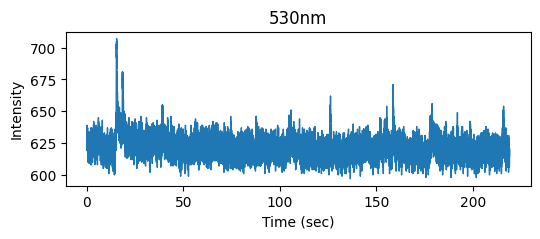

In [64]:
f,ax = plt.subplots(figsize=(6,2))
i = ax.imshow(np.transpose(channel_1), aspect='auto', vmin=0, vmax=900, extent=[np.min(time), np.max(time), 699, 400])
ax.set(xlabel='Time (sec)', ylabel='Wavelength', title='Channel 1')
ax.grid(False)
f.colorbar(i,ax=ax)
plt.show()

f,ax = plt.subplots(figsize=(8,4))
ax.plot(wavelength[:], channel_1[10,:],color='k')
ax.set(xlabel='Wavelength (nm)', ylabel='Intensity', ylim=[0,1200])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

f,ax = plt.subplots(figsize=(6,2))
ax.plot(time[:], channel_1[:,490-400], linewidth=1)
ax.set(xlabel='Time (sec)', ylabel='Intensity', title='530nm')
plt.show()